# Power manifold

In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib
import logging
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sys.path.append("../../")
from experiments.simulators import PowerManifoldSimulator

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
for key in logging.Logger.manager.loggerDict:
    if "experiments" not in key and "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## Set up simulator

In [2]:
# max_power=5
# power_decay=3.
# weight=0.4
# base_coeff_std=1.0
# exp_suppression=0.1

sim = PowerManifoldSimulator(
    draw_constants=False,
    filename="../data/samples/power_manifold/manifold.npz",
#     max_power=max_power,
#     power_decay=power_decay,
#     weight=weight,
#     base_coeff_std=base_coeff_std,
#     exp_suppression=exp_suppression
)


## Plot simulator setup

17:04 experiments.simulators.power_m INFO    Latent variables:
[[-0.56312353  0.05017805]
 [-0.01843586 -0.00223042]
 [ 1.50509521 -1.13960947]
 ...
 [-0.83727841  1.99434922]
 [-1.16605921 -0.03366045]
 [-0.32892505  0.67688014]]


(2601, 2) (2601,)


<IPython.core.display.Javascript object>


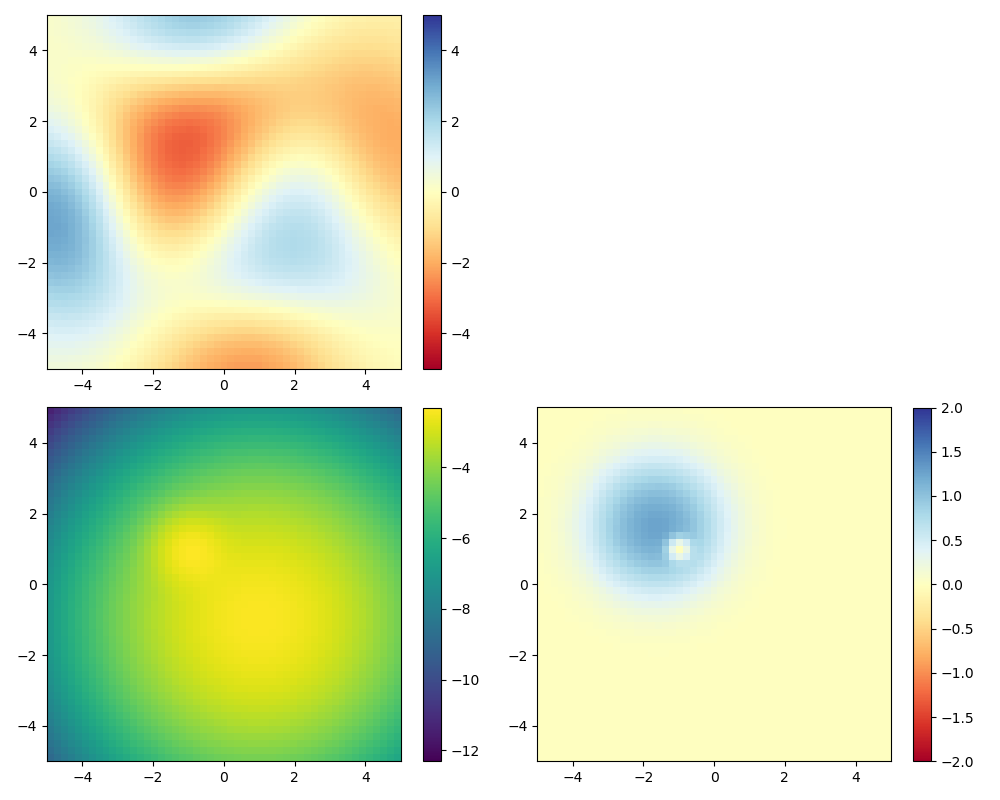

In [3]:
n = 10000
boundary = 5.
cmin, cmax = -5., 5.
theta=0.

x = sim.sample(n, parameters=np.zeros((n,1)))
z, _ = sim._transform_x_to_z(x)
f = sim._fz(z).flatten()
logp = sim._log_density_z(z, parameters=theta*np.ones((n,1))).flatten()
delta_logp = sim._log_density_z(z, parameters=1.*np.ones((n,1))).flatten() - sim._log_density_z(z, parameters=-1.*np.ones((n,1))).flatten()

z_grid_each = np.linspace(-boundary, boundary, 51)
z0, z1 = np.meshgrid(z_grid_each, z_grid_each)
z_grid = np.vstack((z0.flatten(), z1.flatten())).T
f_grid = sim._fz(z_grid).flatten()
logp_grid = sim._log_density_z(z_grid, parameters=theta*np.ones((51**2,1))).flatten()
delta_logp_grid = sim._log_density_z(z_grid, parameters=1.*np.ones((51**2,1))).flatten() - sim._log_density_z(z_grid, parameters=-1.*np.ones((51**2,1))).flatten()

print(z_grid.shape, logp_grid.shape)

cmin, cmax = -boundary, boundary
f_ = np.clip(f, cmin, cmax)

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(2, 2, 1)
sc = ax.imshow(
    f_grid.reshape((51, 51)),
    extent=(-boundary, boundary, -boundary, boundary),
    cmap="RdYlBu",
    vmin=cmin,
    vmax=cmax,
    origin="lower"
)
cbar = plt.colorbar(sc)
ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)

ax = fig.add_subplot(2, 2, 3)
sc = ax.imshow(
    logp_grid.reshape((51, 51)),
    extent=(-boundary, boundary, -boundary, boundary),
    cmap="viridis",
    vmin=np.max(logp_grid),
    vmax=np.max(logp_grid)-10.,
    origin="lower"
)
cbar = plt.colorbar(sc)
ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)

ax = fig.add_subplot(2, 2, 4)
sc = ax.imshow(
    delta_logp_grid.reshape((51, 51)),
    extent=(-boundary, boundary, -boundary, boundary),
    cmap="RdYlBu",
    vmin=-2.,
    vmax=2.,
    origin="lower"
)
cbar = plt.colorbar(sc)
ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


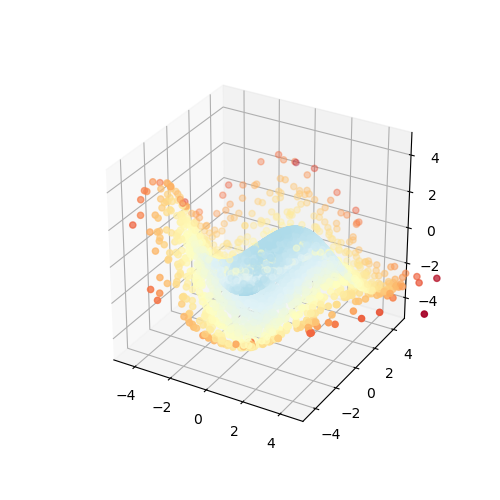

In [4]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1, projection="3d")
sc = ax.scatter(x[:,0], x[:,1], x[:,2], c=logp, cmap="RdYlBu", vmin=-10., vmax=1.)
ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)
ax.set_zlim(-boundary, boundary)

plt.show()